# Frequent Mutations
Histogram figure of frequent mutations for ESM-FCN_BE, version G. We'll choose this model because it was the best mean performance between binding and expression.

In [1]:
import pandas as pd

log_dir = "../../src/pnlp/ESM_TL/logs/"

df = pd.read_csv("/data/spike_ml/Spike_NLP-Lightning/notebooks/models/scatter/esm_fcn_be/esm_fcn_be.G-predicted_vs_measured.values.csv")
df.head(5)

,seq_id,binding_measured_value,binding_predicted_value,expression_measured_value,expression_predicted_value,mode
0,SARS-CoV-2-S19E_E141G_N157A,6.00,5.985470,8.17,8.219058,train
1,SARS-CoV-2-T63F_Y178V_S184L,9.16,9.170079,8.11,8.128667,train
2,SARS-CoV-2-W106A_G146C,6.00,5.997417,7.59,7.673811,train
3,SARS-CoV-2-A18C_R25V_L122T_P149R,6.13,6.163508,8.42,8.468828,train
4,SARS-CoV-2-D59W_P96S,10.16,10.174413,8.02,7.923227,train


### Binding

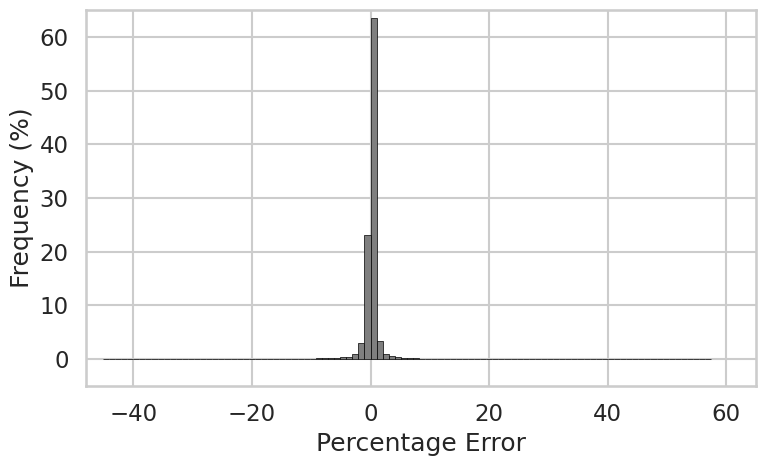

In [50]:
# Binding
binding_df = df[["seq_id", "binding_predicted_value", "binding_measured_value", "mode"]].copy()
binding_df["percentage_error"] = ((df["binding_predicted_value"] - df["binding_measured_value"]) / df["binding_measured_value"]) * 100
binding_df.head(5)

# Plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')
plt.subplots(figsize=(8, 5)) 

plt.hist(
    binding_df["percentage_error"], 
    bins=100, 
    weights=[100 / len(binding_df)] * len(binding_df), 
    edgecolor='black', 
    color='tab:grey',
    linewidth=0.5
)

plt.xlim(-48, 65)  
plt.xlabel("Percentage Error")
plt.ylim(-5, 65)
plt.ylabel("Frequency (%)")
plt.tight_layout()

save_path = "bar/esm_fcn_be.G.binding-percent_error"
plt.savefig(f"{save_path}.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.savefig(f"{save_path}.png", format='png', dpi=300, bbox_inches='tight')

### Expression

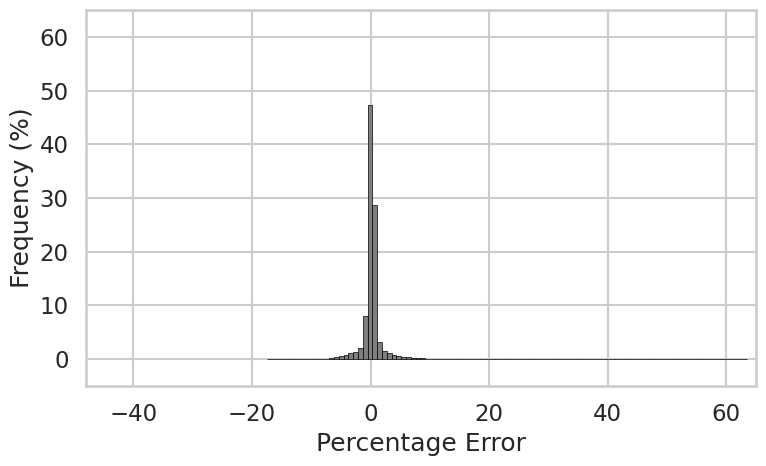

In [51]:
# Expression
expression_df = df[["seq_id", "expression_predicted_value", "expression_measured_value", "mode"]].copy()
expression_df["percentage_error"] = ((df["expression_predicted_value"] - df["expression_measured_value"]) / df["expression_measured_value"]) * 100
expression_df.head(5)

# Plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')
plt.subplots(figsize=(8, 5)) 

plt.hist(
    expression_df["percentage_error"], 
    bins=100, 
    weights=[100 / len(expression_df)] * len(expression_df), 
    edgecolor='black', 
    color='tab:grey',
    linewidth=0.5
)

plt.xlim(-48, 65)  
plt.xlabel("Percentage Error")
plt.ylim(-5, 65)
plt.ylabel("Frequency (%)")
plt.tight_layout()

save_path = "bar/esm_fcn_be.G.expression-percent_error"
plt.savefig(f"{save_path}.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.savefig(f"{save_path}.png", format='png', dpi=300, bbox_inches='tight')